In [1]:
import numpy as np
import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [5]:
train_images.size

47040000

In [6]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
type(train_images)

numpy.ndarray

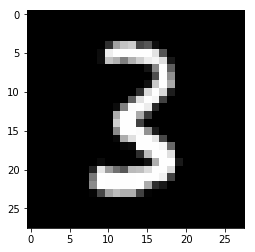

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(train_images[50000], cmap= 'gray')
plt.show()

In [15]:
train_images = (train_images/255)-0.5
test_images = (test_images/255)-0.5

In [16]:
train_images= train_images.reshape((-1, 784))
test_images= test_images.reshape((-1, 784))

In [18]:
#bulid the model
model= Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [19]:
#compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [20]:
#train
model.fit(
    train_images,
    to_categorical(train_labels),
    epochs=5,
    batch_size=32,
)

Epoch 1/5
60000/60000 [==============================] - 14s 235us/step - loss: 0.3747 - accuracy: 0.8868
Epoch 2/5
60000/60000 [==============================] - 7s 121us/step - loss: 0.1950 - accuracy: 0.9402
Epoch 3/5
60000/60000 [==============================] - 7s 116us/step - loss: 0.1477 - accuracy: 0.9550
Epoch 4/5
60000/60000 [==============================] - 7s 112us/step - loss: 0.1238 - accuracy: 0.9617
Epoch 5/5
60000/60000 [==============================] - 7s 111us/step - loss: 0.1061 - accuracy: 0.9668


In [22]:
model.evaluate(
    test_images,
    to_categorical(test_labels)
)

10000/10000 [==============================] - 1s 71us/step


[0.11387911456748843, 0.9623000025749207]

In [24]:
model.save_weights('model.h5')
predict= model.predict(test_images[:5])
print(np.argmax(predict, axis=1))
print(test_labels[:5])

[7 2 1 0 4]
[7 2 1 0 4]
